##**Tests**
###### These are tests only for the third part

**imports:** 

In [29]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from part_3__calculate_distance import SFM

###**visualize:**


Runs the third part and shows the results visually:

In [30]:
def visualize(prev_container, curr_container, focal, pp):
    norm_prev_pts, norm_curr_pts, R, norm_foe, tZ = SFM.prepare_3D_data(prev_container, curr_container, focal, pp)
    norm_rot_pts = SFM.rotate(norm_prev_pts, R)
    rot_pts = SFM.unnormalize(norm_rot_pts, focal, pp)
    foe = np.squeeze(SFM.unnormalize(np.array([norm_foe]), focal, pp))

    fig, (curr_sec, prev_sec) = plt.subplots(1, 2, figsize=(12, 6))
    prev_sec.set_title('prev(' + str(prev_frame_id) + ')')
    prev_sec.imshow(prev_container.img)
    prev_p = prev_container.traffic_light
    prev_sec.plot(prev_p[:, 0], prev_p[:, 1], 'b+')

    curr_sec.set_title('curr(' + str(curr_frame_id) + ')')
    curr_sec.imshow(curr_container.img)
    curr_p = curr_container.traffic_light
    curr_sec.plot(curr_p[:, 0], curr_p[:, 1], 'b+')

    for i in range(len(curr_p)):
        curr_sec.plot([curr_p[i, 0], foe[0]], [curr_p[i, 1], foe[1]], 'b')
        if curr_container.valid[i]:
            curr_sec.text(curr_p[i, 0], curr_p[i, 1],
                          r'{0:.1f}'.format(curr_container.traffic_lights_3d_location[i, 2]), color='r')
    curr_sec.plot(foe[0], foe[1], 'r+')
    curr_sec.plot(rot_pts[:, 0], rot_pts[:, 1], 'g+')
    plt.show()




class to keep the information on one frame:

In [31]:
class FrameContainer(object):
    def __init__(self, img_path):
        self.img=plt.imread(img_path)
        self.traffic_light = []
        self.traffic_lights_3d_location = []
        self.EM = []
        self.corresponding_ind = []
        self.valid = []

read data and run:

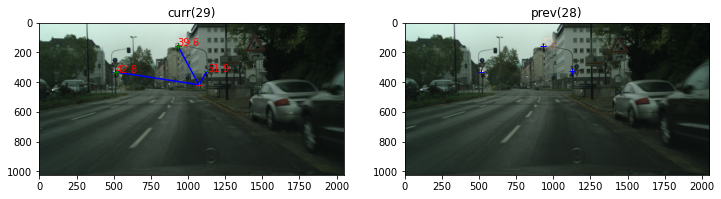

In [32]:
curr_frame_id = 29
prev_frame_id = 28
pkl_path = '../data/dusseldorf_000049.pkl'
prev_img_path = '../data/dusseldorf_000049_0000' + str(prev_frame_id) + '_leftImg8bit.png'
curr_img_path = '../data/dusseldorf_000049_0000' + str(curr_frame_id) + '_leftImg8bit.png'
prev_container = FrameContainer(prev_img_path)
curr_container = FrameContainer(curr_img_path)
with open(pkl_path, 'rb') as pklfile:
    data = pickle.load(pklfile, encoding='latin1')
focal = data['flx']
pp = data['principle_point']
prev_container.traffic_light = np.array(data['points_' + str(prev_frame_id)][0])
curr_container.traffic_light = np.array(data['points_' + str(curr_frame_id)][0])
EM = np.eye(4)
for i in range(prev_frame_id, curr_frame_id):
    EM = np.dot(data['egomotion_' + str(i) + '-' + str(i + 1)], EM)
curr_container.EM = EM
curr_container = SFM.calc_TFL_dist(prev_container, curr_container, focal, pp)
visualize(prev_container, curr_container, focal, pp)